# CLDN16 gpc

In [10]:
import gpsea
from gpsea.preprocessing import configure_caching_cohort_creator, load_phenopacket_folder
from gpsea.preprocessing import UniprotProteinMetadataService, VVMultiCoordinateService
from gpsea.analysis import configure_cohort_analysis, CohortAnalysisConfiguration
from gpsea.model import VariantEffect
from gpsea.model.genome import GRCh38
from gpsea.analysis.predicate import PatientCategories
from gpsea.view import CohortViewable, ProteinVisualizable, ProteinVisualizer, ProteinViewable
from IPython.display import HTML, display
import hpotk

print(f"Using gpsea version {gpsea.__version__}")

Using gpsea version 0.1.1dev


In [3]:
import hpotk
hpotk.util.setup_logging()

In [4]:
fpath_hpo = 'https://github.com/obophenotype/human-phenotype-ontology/releases/download/v2023-10-09/hp.json'
hpo = hpotk.load_minimal_ontology(fpath_hpo)

In [5]:
from gpsea.preprocessing import configure_caching_cohort_creator, load_phenopackets
from ppktstore.registry import configure_phenopacket_registry

cohort_creator = configure_caching_cohort_creator(hpo)

cohort_name = 'CLDN16'
phenopacket_store_release = '0.1.19'

registry = configure_phenopacket_registry()
with registry.open_phenopacket_store(phenopacket_store_release) as ps:
    phenopackets = tuple(ps.iter_cohort_phenopackets(cohort_name))

cohort, validation = load_phenopackets(
    phenopackets=phenopackets, 
    cohort_creator=cohort_creator,
)
del phenopackets
validation.summarize()

Patients Created: 100%|██████████| 46/46 [00:38<00:00,  1.19it/s]
Validated under none policy
No errors or warnings were found


In [6]:
CLDN16_transcript = 'NM_006580.4' # version number important, nucleotide numbering changed compared to version 3

In [7]:
from gpsea.view import CohortViewable
viewer = CohortViewable(hpo)
display(HTML(viewer.process(cohort=cohort, transcript_id=CLDN16_transcript)))

HPO Term,ID,Seen in n individuals
Nephrocalcinosis,HP:0000121,46
Hypercalciuria,HP:0002150,41
Hypermagnesiuria,HP:0012608,32
Renal insufficiency,HP:0000083,32
Renal magnesium wasting,HP:0005567,30
Elevated circulating parathyroid hormone level,HP:0003165,29
Polyuria,HP:0000103,23
Polydipsia,HP:0001959,22
Hypomagnesemia,HP:0002917,20
Recurrent urinary tract infections,HP:0000010,16


<Axes: title={'center': 'Claudin-16\ntranscript: NM_006580.4, protein: NP_006571.1'}>

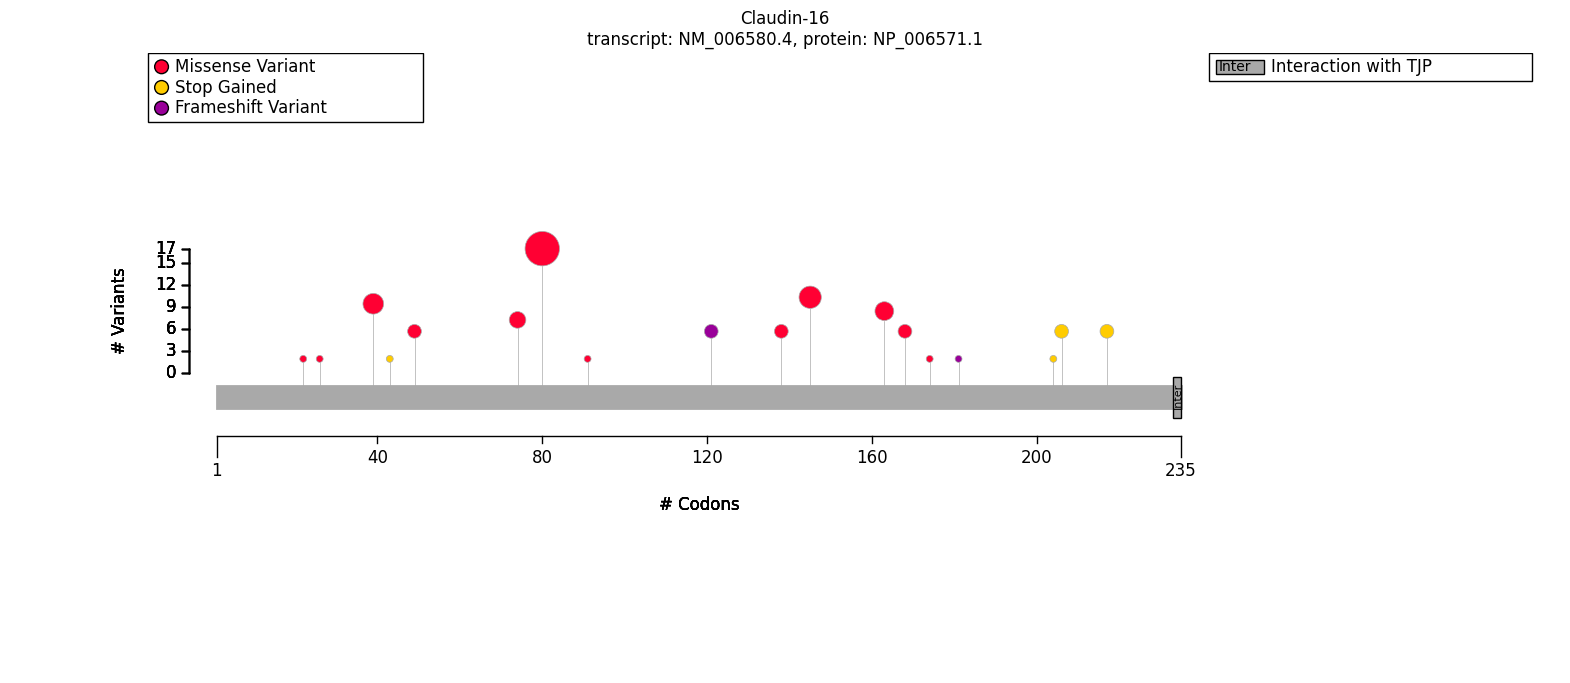

In [8]:
from gpsea.preprocessing import UniprotProteinMetadataService
from gpsea.model.genome import GRCh38
from gpsea.preprocessing import VVMultiCoordinateService
pms = UniprotProteinMetadataService()
protein_meta = pms.annotate('NP_006571.1')
txc_service = VVMultiCoordinateService(genome_build=GRCh38)
tx_coordinates = txc_service.fetch(CLDN16_transcript)
from gpsea.view import ProteinVisualizable, ProteinVisualizer
pvis = ProteinVisualizable(tx_coordinates=tx_coordinates, protein_meta=protein_meta, cohort=cohort)
drawer = ProteinVisualizer()
drawer.draw_fig(pvis=pvis)

In [11]:
viewer = ProteinViewable()
html_prot = viewer.process(cohort, pvis)
display(HTML(html_prot))

Feature Name,Feature Type,Feature Coordinates,Variants in Feature
Interaction with TJP1,motif,233 - 235,0


In [12]:
from gpsea.analysis import configure_cohort_analysis, CohortAnalysisConfiguration
from gpsea.analysis.predicate import PatientCategories
from gpsea.model.genome import Region

analysis_config = CohortAnalysisConfiguration()
analysis_config.missing_implies_excluded = False
analysis_config.hpo_mtc_strategy()
analysis = configure_cohort_analysis(cohort, hpo, config=analysis_config)

In [13]:
from gpsea.model import VariantEffect
from gpsea.analysis.predicate.genotype import VariantPredicates

is_missense = VariantPredicates.variant_effect(VariantEffect.MISSENSE_VARIANT, tx_id=CLDN16_transcript)
missense = analysis.compare_hpo_vs_genotype(is_missense)
missense.summarize(hpo, PatientCategories.YES)

MISSENSE_VARIANT on NM_006580.4                       Yes            No  \
                                                    Count Percent Count   
Stage 5 chronic kidney disease [HP:0003774]          2/35      6%   3/8   
Hypocalcemia [HP:0002901]                             8/9     89%   2/6   
Nephrolithiasis [HP:0000787]                         7/30     23%   1/1   
Failure to thrive [HP:0001508]                       7/24     29%   1/1   
Recurrent urinary tract infections [HP:0000010]     13/26     50%   3/4   
Polyuria [HP:0000103]                               20/25     80%   3/3   
Hypermagnesiuria [HP:0012608]                       25/27     93%   7/7   
Hypomagnesemia [HP:0002917]                         11/12     92%   7/7   
Hypocalcemic seizures [HP:0002199]                    2/5     40%   1/5   
Polydipsia [HP:0001959]                             19/24     79%   3/3   
Hypercalciuria [HP:0002150]                         32/36     89%   7/7   
Elevated circulating parathyroid hormone level ...  25/26     96%   3/3   

MISSENSE_VARIANT on NM_006580.4                                       \
                                                   Percent   p value   
Stage 5 chronic kidney disease [HP:0003774]            38%  0.037218   
Hypocalcemia [HP:0002901]                              33%  0.088911   
Nephrolithiasis [HP:0000787]                          100%  0.258065   
Failure to thrive [HP:0001508]                        100%  0.320000   
Recurrent urinary tract infections [HP:0000010]        75%  0.601533   
Polyuria [HP:0000103]                                 100%  1.000000   
Hypermagnesiuria [HP:0012608]                         100%  1.000000   
Hypomagnesemia [HP:0002917]                           100%  1.000000   
Hypocalcemic seizures [HP:0002199]                     20%  1.000000   
Polydipsia [HP:0001959]                               100%  1.000000   
Hypercalciuria [HP:0002150]                           100%  1.000000   
Elevated circulating parathyroid hormone level ...    100%  1.000000   

MISSENSE_VARIANT on NM_006580.4                                       
                                                   Corrected p value  
Stage 5 chronic kidney disease [HP:0003774]                 0.446616  
Hypocalcemia [HP:0002901]                                   1.000000  
Nephrolithiasis [HP:0000787]                                1.000000  
Failure to thrive [HP:0001508]                              1.000000  
Recurrent urinary tract infections [HP:0000010]             1.000000  
Polyuria [HP:0000103]                                       1.000000  
Hypermagnesiuria [HP:0012608]                               1.000000  
Hypomagnesemia [HP:0002917]                                 1.000000  
Hypocalcemic seizures [HP:0002199]                          1.000000  
Polydipsia [HP:0001959]                                     1.000000  
Hypercalciuria [HP:0002150]                                 1.000000  
Elevated circulating parathyroid hormone level ...          1.000000